## Observations and Insights

## Dependencies and starter code

In [204]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
mouse_metadata.head()

# Combine the data into a single dataset
combined_results = pd.merge(mouse_metadata, study_results, how= 'outer', on="Mouse ID")
combined_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [276]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = combined_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = combined_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Count of Test subjects')

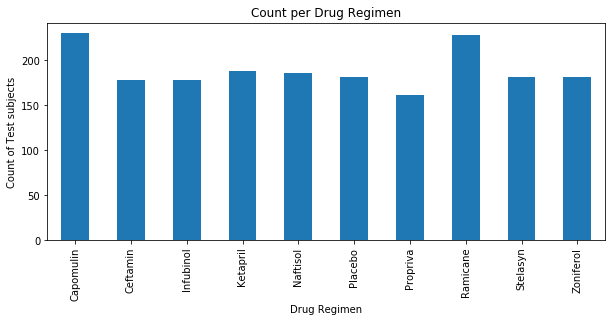

In [206]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_count = (combined_results.groupby(["Drug Regimen"])["Mouse ID"].count())

# Chart our data, give it a title, and label the axes
regimen_datapoints = regimen_count.plot(kind="bar", title="Count per Drug Regimen",figsize=(10,4))
regimen_datapoints.set_xlabel("Drug Regimen")
regimen_datapoints.set_ylabel("Count of Test subjects")


Text(0.5, 0, 'Drug Regimen')

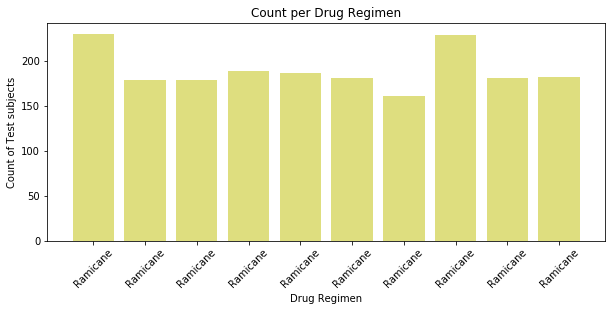

In [207]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regimen_count = (combined_results.groupby(["Drug Regimen"])["Mouse ID"].count())
x_axis = np.arange(len(regimen_count))
plt.figure(figsize=(10,4))
plt.bar(x_axis, regimen_count, color="y", align="center", alpha=0.5)
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, combined_results["Drug Regimen"], rotation=45)
plt.title("Count per Drug Regimen")
plt.ylabel("Count of Test subjects")
plt.xlabel("Drug Regimen")

## Pie plots

# Generate a pie plot showing the distribution of female versus male mice using pandas

Text(0, 0.5, '')

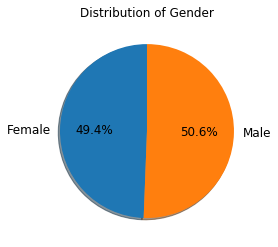

In [208]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = (combined_results.groupby(["Sex"])["Mouse ID"].count())
ax1 = plt.subplot(121, aspect='equal')
gender_pie = gender_count.plot(kind='pie', ax=ax1, autopct='%1.1f%%', startangle=90, shadow=True, legend = False, fontsize=12, figsize=(10,4),title="Distribution of Gender")
gender_pie.set_ylabel ('')

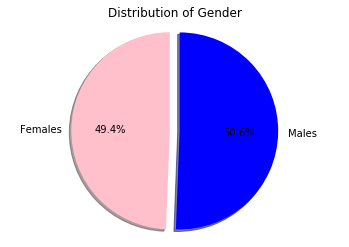

In [209]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Distribution of Gender")
plt.pie(gender_count, explode= (0.1, 0), colors=["pink", "blue"], labels=["Females", "Males"],
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [251]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
# Promising treatments: Capomulin, Ceftamin, Infubinol, & Ramicane

top4_regimen = combined_results.loc[combined_results['Drug Regimen'].isin(['Capomulin','Ceftamin','Infubinol','Ramicane'])]
top4_final = top4_regimen.groupby('Mouse ID').max()['Timepoint']
top4_vol = pd.DataFrame(top4_final)
top4_stat = pd.merge(top4_vol, combined_results, on=("Mouse ID","Timepoint"),how="left")
top4_stat

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [250]:
# To calculate final tunor volume, start with extracting last (greatest) timepoint for each mouse

#top4_sorted = top4_regimen.sort_values(["Timepoint", "Mouse ID"], ascending=False)
#max_df = top4_sorted.loc[top4_sorted["Timepoint"] == 45]

cap_data = top4_stat[top4_stat['Drug Regimen'].isin(['Capomulin'])]
cap_stat = cap_data["Tumor Volume (mm3)"]

quartiles = cap_stat.quantile([.25,.5,.75])
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print("Capomulin quartile calculations:")
print(f"IQR = {round(iqr,2)}")
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

Capomulin quartile calculations:
IQR = 7.78
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.


In [255]:
cef_data = top4_stat[top4_stat['Drug Regimen'].isin(['Ceftamin'])]
cef_stat = cef_data["Tumor Volume (mm3)"]

quartiles2 = cef_stat.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2
lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print("Ceftamin quartile calculations:")
print(f"IQR = {round(iqr2,2)}")
print(f"Values below {round(lower_bound2,2)} could be outliers.")
print(f"Values above {round(upper_bound2,2)} could be outliers.")


Ceftamin quartile calculations:
IQR = 15.58
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.


In [256]:
inf_data = top4_stat[top4_stat['Drug Regimen'].isin(['Infubinol'])]
inf_stat = inf_data["Tumor Volume (mm3)"]

quartiles3 = inf_stat.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3
lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print("Infubinol quartile calculations:")
print(f"IQR = {round(iqr3,2)}")
print(f"Values below {round(lower_bound3,2)} could be outliers.")
print(f"Values above {round(upper_bound3,2)} could be outliers.")

Infubinol quartile calculations:
IQR = 11.48
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.


In [257]:
ram_data = top4_stat[top4_stat['Drug Regimen'].isin(['Ramicane'])]
ram_stat = ram_data["Tumor Volume (mm3)"]

quartiles4 = ram_stat.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4
lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print("Ramicane quartile calculations:")
print(f"IQR = {round(iqr4,2)}")
print(f"Values below {round(lower_bound4,2)} could be outliers.")
print(f"Values above {round(upper_bound4,2)} could be outliers.")

Ramicane quartile calculations:
IQR = 9.1
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


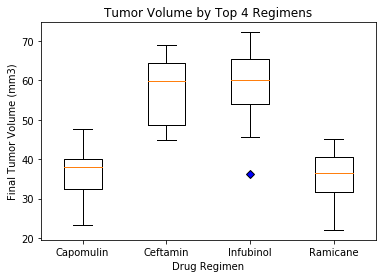

In [284]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [cap_stat, cef_stat, inf_stat, ram_stat]

blue_dmd = dict(markerfacecolor='b', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Top 4 Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ceftamin","Infubinol","Ramicane"], flierprops=blue_dmd)

plt.savefig('boxplot')
plt.show()


## Line and scatter plots

In [261]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_df = top4_regimen.loc[top4_regimen['Mouse ID'] == "b128",:]
cap_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


Text(0, 0.5, 'Tumor Volume (mm3)')

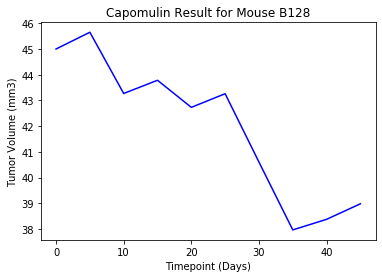

In [262]:
time = cap_df["Timepoint"]
tumor_vol = cap_df["Tumor Volume (mm3)"]
cap_plot = plt.plot(time, tumor_vol, color="blue")
plt.title('Capomulin Result for Mouse B128')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


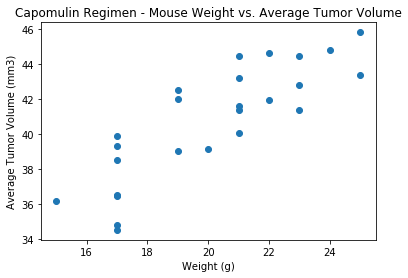

In [263]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
all_cap = top4_regimen[top4_regimen['Drug Regimen'].isin(['Capomulin'])]
all_cap = all_cap.groupby(['Mouse ID']).mean()
plt.scatter(all_cap['Weight (g)'],all_cap['Tumor Volume (mm3)'])
plt.title('Capomulin Regimen - Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [264]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(all_cap['Weight (g)'],all_cap['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


Text(0, 0.5, 'Average Tumore Volume (mm3)')

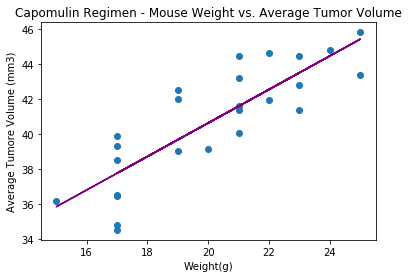

In [265]:
# Calculate linear regression model for mouse weight and average tumor volume for the Capomulin regimen
cap_slope, cap_int, cap_r, cap_p, cap_std_err = st.linregress(all_cap['Weight (g)'],all_cap['Tumor Volume (mm3)'])
cap_line = cap_slope * all_cap['Weight (g)'] + cap_int

plt.scatter(all_cap['Weight (g)'],all_cap['Tumor Volume (mm3)'])
plt.plot(all_cap['Weight (g)'],cap_line,color="purple")
plt.title('Capomulin Regimen - Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
